In [1]:
# Import Libaries and tools
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 24})

ROOT_DIR = os.path.abspath("../../")

In [2]:
# Collection of results
datasetFiles = sorted(glob.glob('Results/CR*.csv.TempFx.npz')) 

In [3]:
# Open data summary for first file
data = np.load(datasetFiles[0], allow_pickle=True)
lst = data.files
print(datasetFiles[0])

# Get innital list of stats
IOUpast    = data[lst[0]]
IOUfuture  = data[lst[1]]
SSIMpast   = data[lst[2]]
SSIMfuture = data[lst[3]]
GCEpast    = data[lst[4]]
GCEfuture  = data[lst[5]]
LCEpast    = data[lst[6]]
LCEfuture  = data[lst[7]]

# Expand with data for all other CR - if applicable
for i in range(1,len(datasetFiles)-1):
    
    # Open data summary
    data = np.load(datasetFiles[i], allow_pickle=True)
    lst = data.files
    print(datasetFiles[i])
    
    # append stats
    IOUpast    = np.vstack([IOUpast,   data[lst[0]]])
    IOUfuture  = np.vstack([IOUfuture, data[lst[1]]])
    SSIMpast   = np.vstack([SSIMpast,  data[lst[2]]])
    SSIMfuture = np.vstack([SSIMfuture,data[lst[3]]])
    GCEpast    = np.vstack([GCEpast,   data[lst[4]]])
    GCEfuture  = np.vstack([GCEfuture, data[lst[5]]])
    LCEpast    = np.vstack([LCEpast,   data[lst[6]]])
    LCEfuture  = np.vstack([LCEfuture, data[lst[7]]])

Results/CR2099.csv.TempFx.npz
Results/CR2100.csv.TempFx.npz
Results/CR2101.csv.TempFx.npz


In [4]:
print('Number of Entries: ',len(IOUpast))

Number of Entries:  1763


In [5]:
# Calculate Stats
meanIOUpast    = np.nanmean(IOUpast,axis=0)
stdIOUpast     = np.nanstd(IOUpast,axis=0)
meanIOUfuture  = np.nanmean(IOUfuture,axis=0)
stdIOUfuture   = np.nanstd(IOUfuture,axis=0)
meanSSIMpast   = np.nanmean(SSIMpast,axis=0)
stdSSIMpast    = np.nanstd(SSIMpast,axis=0)
meanSSIMfuture = np.nanmean(SSIMfuture,axis=0)
stdSSIMfuture  = np.nanstd(SSIMfuture,axis=0)
meanGCEpast    = np.nanmean(GCEpast,axis=0)
stdGCEpast     = np.nanstd(GCEpast,axis=0)
meanGCEfuture  = np.nanmean(GCEfuture,axis=0)
stdGCEfuture   = np.nanstd(GCEfuture,axis=0)
meanLCEpast    = np.nanmean(LCEpast,axis=0)
stdLCEpast     = np.nanstd(LCEpast,axis=0)
meanLCEfuture  = np.nanmean(LCEfuture,axis=0)
stdLCEfuture   = np.nanstd(LCEfuture,axis=0)

In [6]:
# Ensure Folder Exists
saveDirectory = '/Figures/TempEffects/'
saveDirectory = ROOT_DIR + saveDirectory

if not os.path.exists(saveDirectory):
    os.makedirs(saveDirectory)

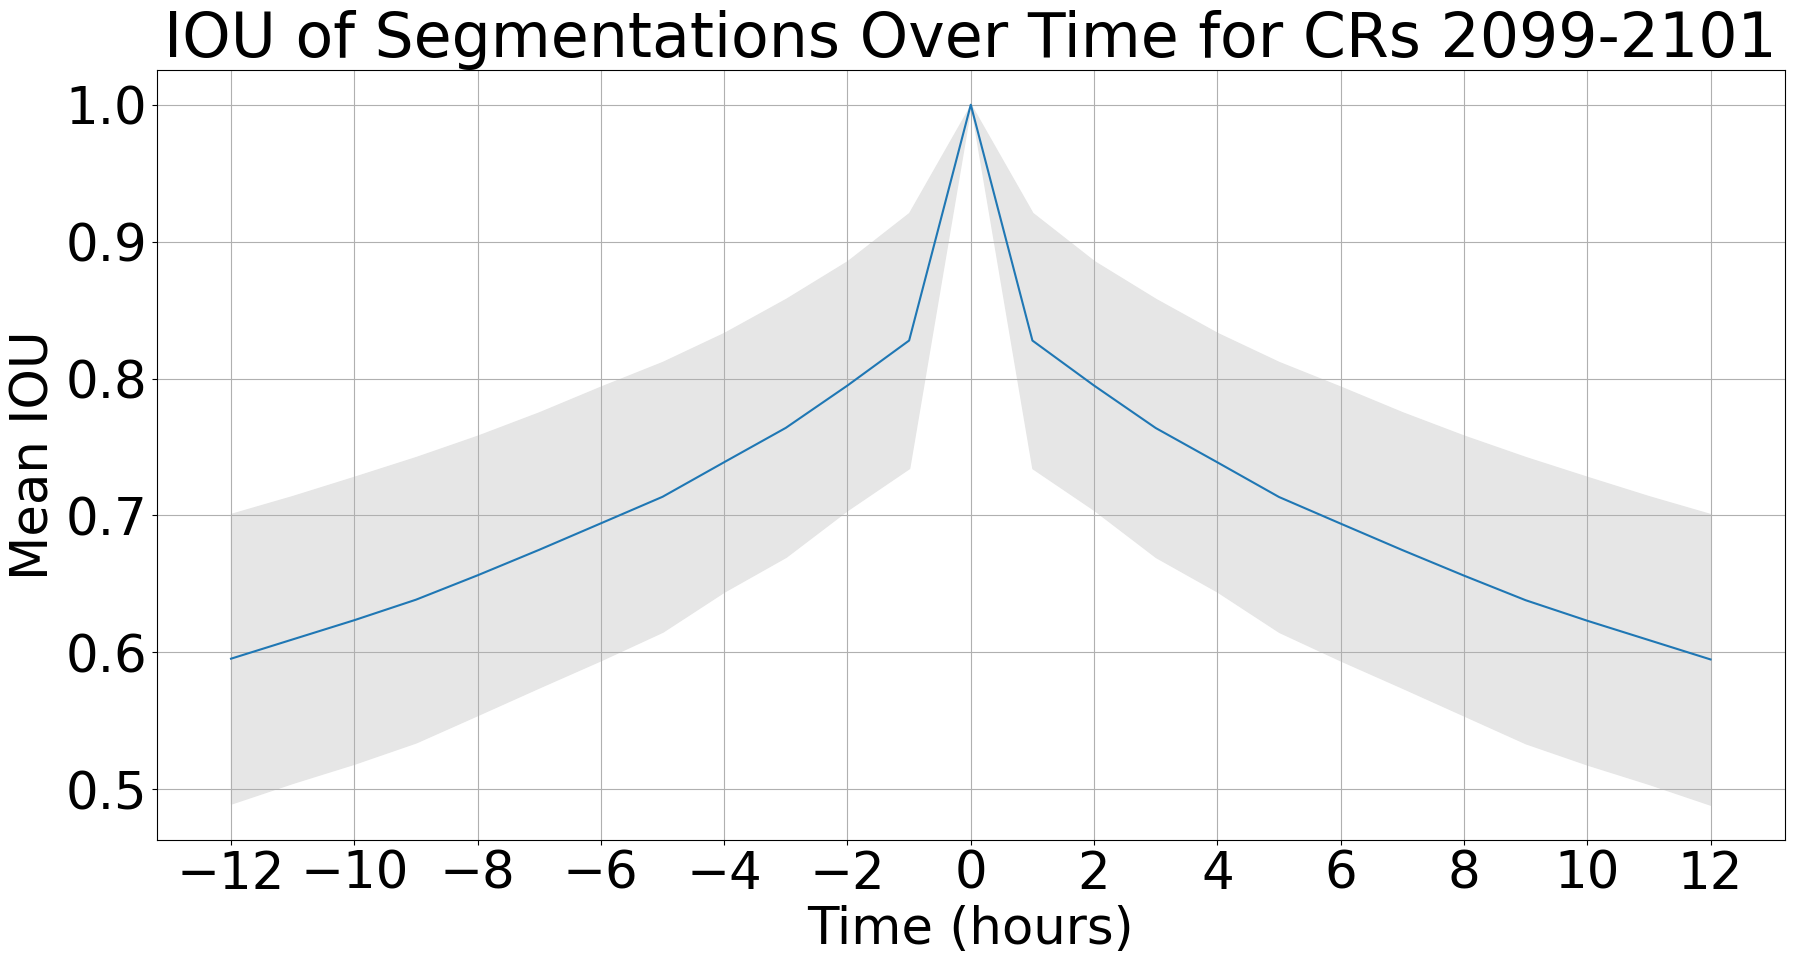

In [7]:
# IOU
plt.figure(figsize=[21,10])
plt.rcParams.update({'font.size': 37})
s = 'IOU of Segmentations Over Time for CRs 2099-2101'
plt.title(s)
plt.rcParams.update({'font.size': 40})

# stack past and present for one graph
hours   = np.asarray(range(len(meanIOUpast))) + 1
hours   = np.hstack([np.flip(-hours),0,hours])
meanIOU = np.hstack([np.flip(meanIOUpast),1,meanIOUfuture])
stdIOU  = np.hstack([np.flip(stdIOUpast),0,stdIOUfuture])

# Plot
plt.plot(hours,meanIOU)
plt.fill_between(hours,meanIOU-stdIOU,
                 meanIOU+stdIOU,color=(.9,.9,.9))
plt.xticks(np.array(range(-12,13,2)))
plt.ylabel('Mean IOU')
plt.xlabel('Time (hours)')
plt.grid()

# Title and Save
title = 'IOU_earlyData.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

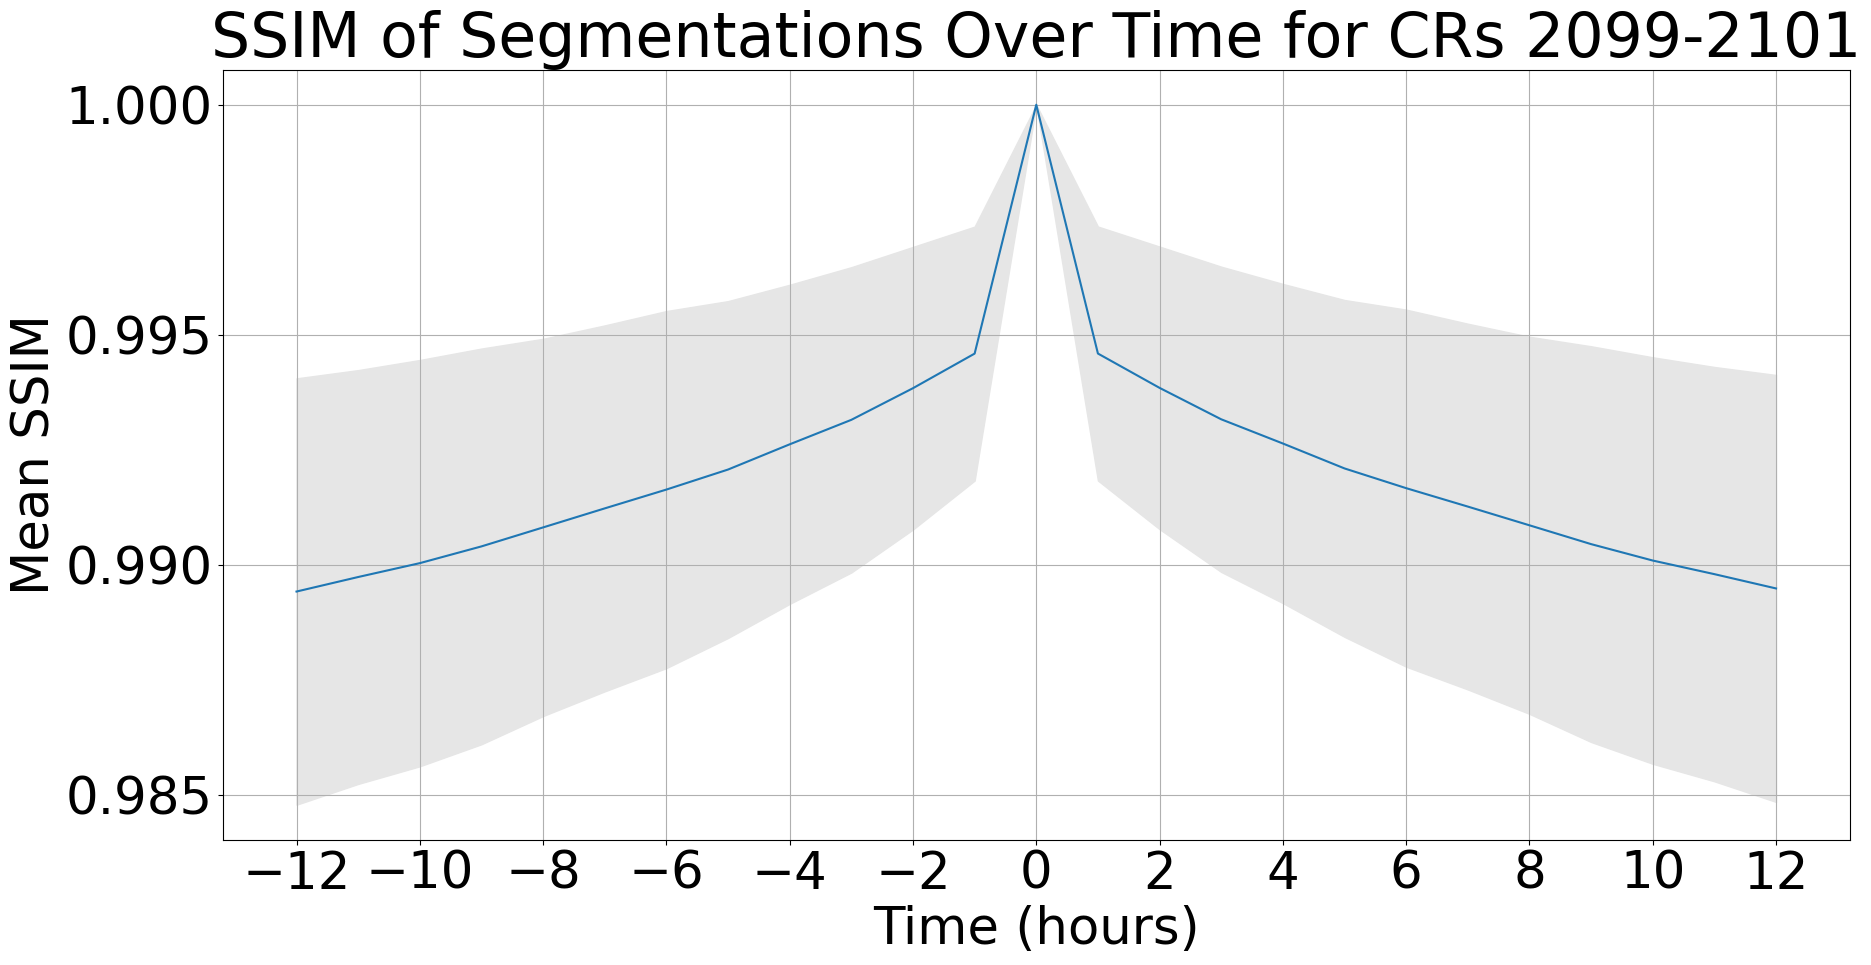

In [8]:
# SSIM
plt.figure(figsize=[21,10])
plt.rcParams.update({'font.size': 37})
s = 'SSIM of Segmentations Over Time for CRs 2099-2101'
plt.title(s)
plt.rcParams.update({'font.size': 40})

# stack past and present for one graph
hours    = np.asarray(range(len(meanSSIMpast))) + 1
hours    = np.hstack([np.flip(-hours),0,hours])
meanSSIM = np.hstack([np.flip(meanSSIMpast),1,meanSSIMfuture])
stdSSIM  = np.hstack([np.flip(stdSSIMpast),0,stdSSIMfuture])

# Plot
plt.plot(hours,meanSSIM)
plt.fill_between(hours,meanSSIM-stdSSIM,
                 meanSSIM+stdSSIM,color=(.9,.9,.9))
plt.xticks(np.array(range(-12,13,2)))
plt.ylabel('Mean SSIM')
plt.xlabel('Time (hours)')
plt.grid()

# Title and Save
title = 'SSIM_earlyData.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

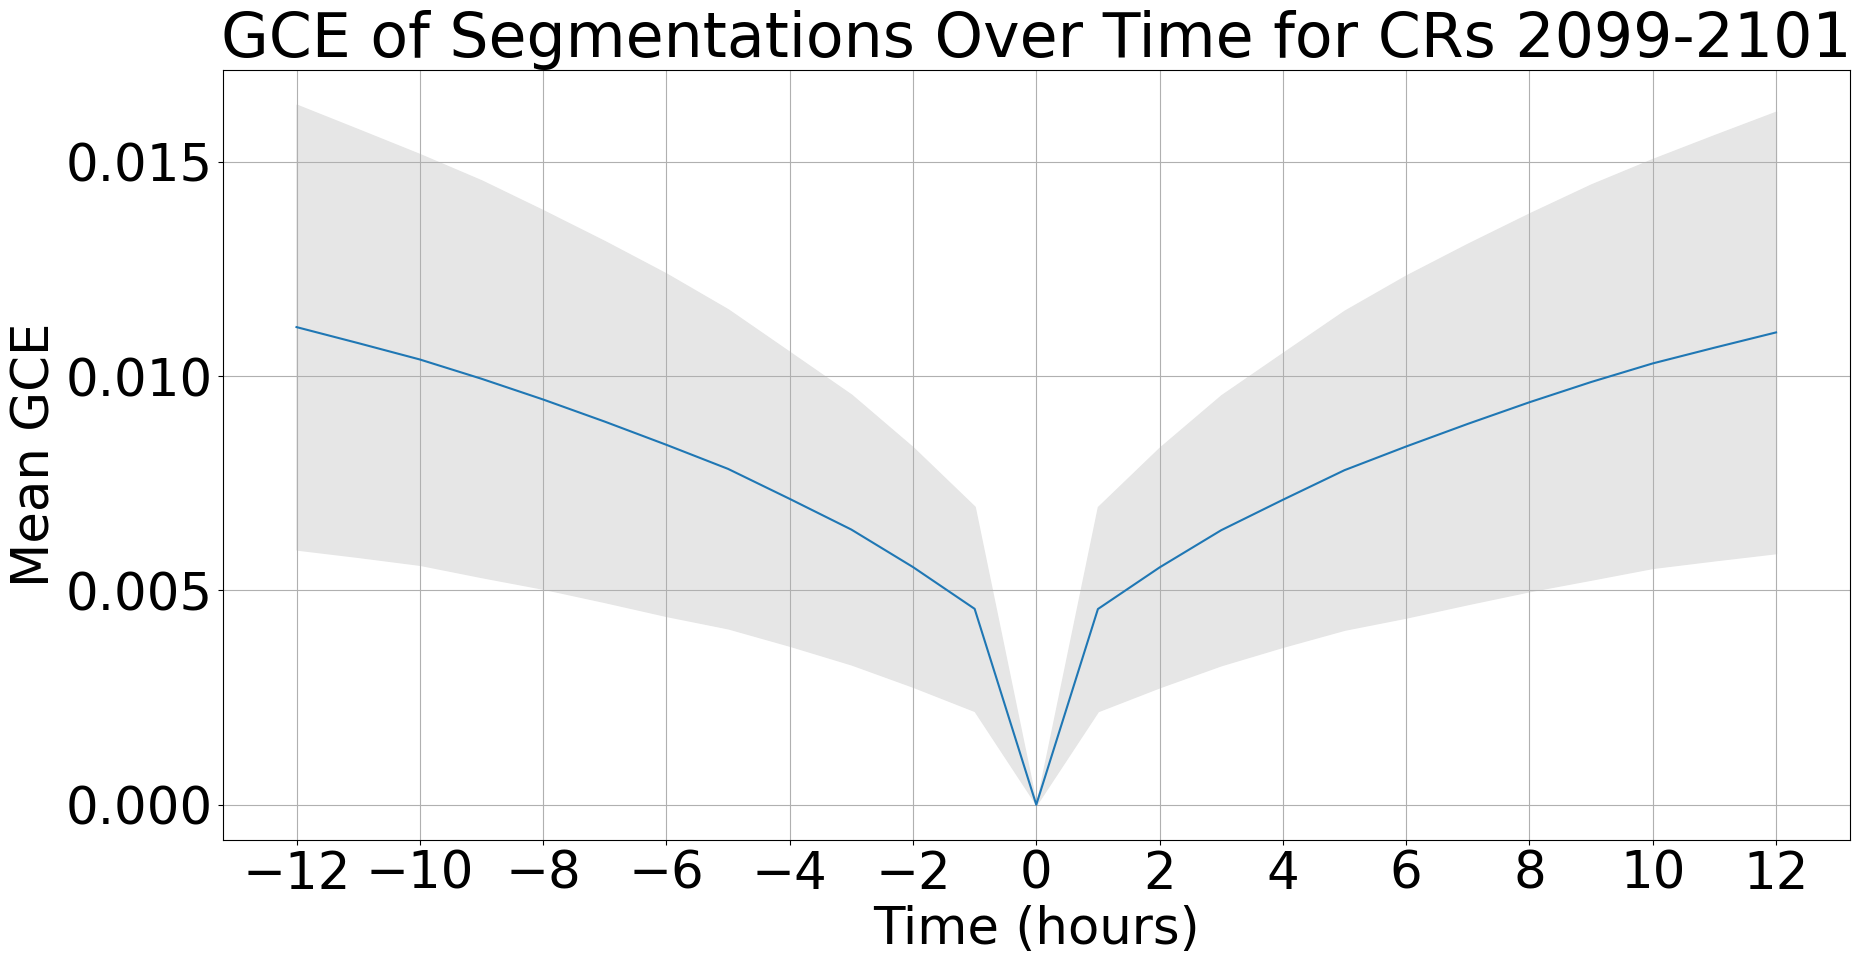

In [9]:
# GCE
plt.figure(figsize=[21,10])
plt.rcParams.update({'font.size': 37})
s = 'GCE of Segmentations Over Time for CRs 2099-2101'
plt.title(s)
plt.rcParams.update({'font.size': 40})

# stack past and present for one graph
hours   = np.asarray(range(len(meanGCEpast))) + 1
hours   = np.hstack([np.flip(-hours),0,hours])
meanGCE = np.hstack([np.flip(meanGCEpast),0,meanGCEfuture])
stdGCE  = np.hstack([np.flip(stdGCEpast),0,stdGCEfuture])

# Plot
plt.plot(hours,meanGCE)
plt.fill_between(hours,meanGCE-stdGCE,
                 meanGCE+stdGCE,color=(.9,.9,.9))
plt.xticks(np.array(range(-12,13,2)))
plt.ylabel('Mean GCE')
plt.xlabel('Time (hours)')
plt.grid()

# Title and Save
title = 'GCE_earlyData.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()

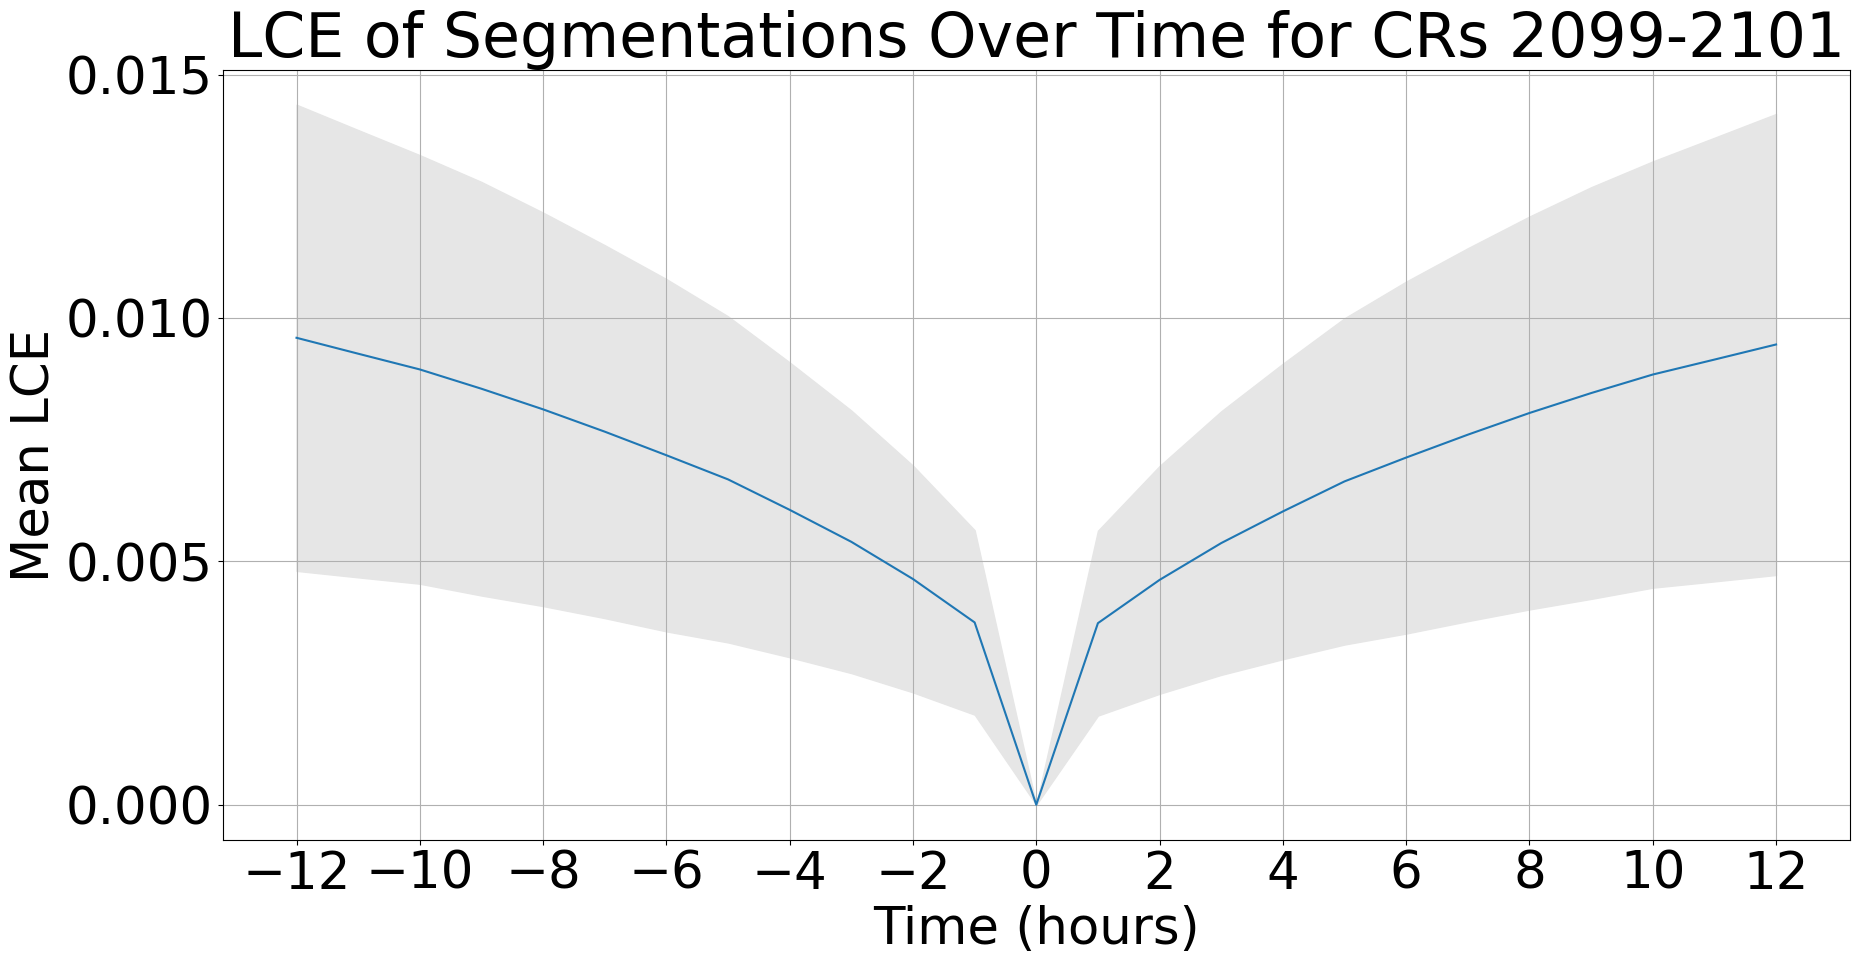

In [10]:
# LCE
plt.figure(figsize=[21,10])
plt.rcParams.update({'font.size': 37})
s = 'LCE of Segmentations Over Time for CRs 2099-2101'
plt.title(s)
plt.rcParams.update({'font.size': 40})

# stack past and present for one graph
hours   = np.asarray(range(len(meanLCEpast))) + 1
hours   = np.hstack([np.flip(-hours),0,hours])
meanLCE = np.hstack([np.flip(meanLCEpast),0,meanLCEfuture])
stdLCE  = np.hstack([np.flip(stdLCEpast),0,stdLCEfuture])

# Plot
plt.plot(hours,meanLCE)
plt.fill_between(hours,meanLCE-stdLCE,
                 meanLCE+stdLCE,color=(.9,.9,.9))
plt.xticks(np.array(range(-12,13,2)))
plt.ylabel('Mean LCE')
plt.xlabel('Time (hours)')
plt.grid()

# Title and Save
title = 'LCE_earlyData.eps'
title = saveDirectory + title
plt.savefig(title)
plt.show()